## Punto 10

In [1]:
from skimage.transform import resize
from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy import linalg as LA

In [2]:
persona = io.imread('imagenes/C1.jpeg',as_gray=True)
persona = resize(persona, (700, 500), anti_aliasing=True)
fondo = io.imread('imagenes/fondo.JPG',as_gray=True)
fondo = resize(fondo, (700, 500), anti_aliasing=True)

In [3]:
output = {}
norm1 = {}
norm2 = {}
normInf = {}
normFro = {}
i = 1
flag = True
while flag:
    SA = (7*i/(i**3 + 0.5))*fondo
    SB = (1-(7*i/(i**3 + 0.5)))*persona
    output[i]= SA + SB
    norm1[i] = LA.norm(persona - output[i],1)
    norm2[i] = LA.norm(persona -output[i],2)
    normInf[i] = LA.norm(persona - output[i], np.inf)
    normFro[i] = LA.norm(persona - output[i],'fro')
    
    if norm1[i] < 0.01 and norm2[i] < 0.01 and normInf[i] < 0.01 and normFro[i] < 0.01 and i > 1001:
        flag = False
        
    i = i+1

In [4]:
def getK(norm,nombre):
    for key, value in norm.items():
        if value < 0.01:
            print(nombre ,': ',key)
            break
            
getK(normFro,'Frobenius')
getK(norm1,'1')
getK(norm2,'2')
getK(normInf,'Infinita')

Frobenius :  384
1 :  510
2 :  309
Infinita :  390


Primeras 10 fotos de la Sucesion


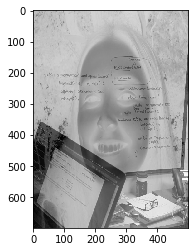

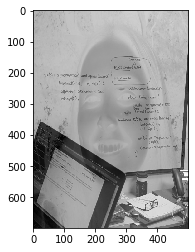

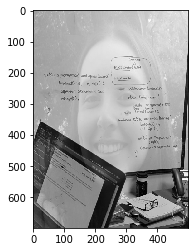

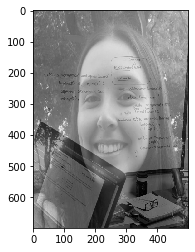

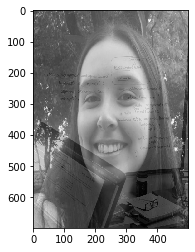

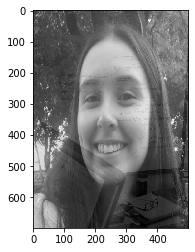

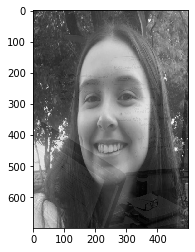

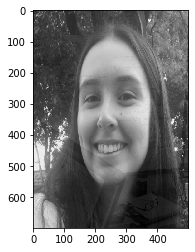

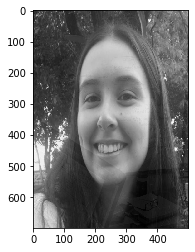

Elemento 1000-esimo de la Sucesion


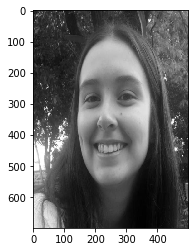

In [9]:
print("Primeras 10 fotos de la Sucesion")
for i in range(1,10,1): 
    plt.figure()
    plt.imshow(output[i],cmap=plt.cm.gray)
    plt.show()
    
print("Elemento 1000-esimo de la Sucesion")   
plt.imshow(output[1000],cmap=plt.cm.gray)
plt.show()

Elemento 1000-esimo

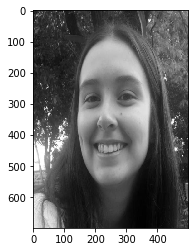

In [6]:
plt.imshow(output[1001],cmap=plt.cm.gray)
plt.show()